<a href="https://colab.research.google.com/github/aruna20200/aruna_akula/blob/master/LAB_TASK_SKlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 10 rows of X:\n", X[:10])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


Splitting the dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.3, random_state = 1
)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


Train the Model

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=1)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# Providing sample data and the model will make prediction out of that data

sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = classifier_knn.predict(sample)
pred_species = [iris.target_names[p] for p in preds] 
print("Predictions:", pred_species)

Accuracy: 0.9833333333333333
Predictions: ['versicolor', 'virginica']


Model Persistence

In [9]:
from sklearn.externals import joblib
joblib.dump(classifier_knn, 'iris_classifier_knn.joblib')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['iris_classifier_knn.joblib']

In [10]:
joblib.load('iris_classifier_knn.joblib')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Binarisation

In [36]:
import numpy as np
from sklearn import preprocessing
Input_data = np.array(
 [ [2.1, -1.9, 5.5], 
 [-1.5, 2.4, 3.5],
 [0.5, -7.9, 5.6],
 [5.9, 2.3, -5.8]]
)
data_binarized = preprocessing.Binarizer(threshold=0.5).transform(Input_data)
print("\nBinarized data:\n", data_binarized)


Binarized data:
 [[1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


Mean Removal

In [32]:
import numpy as np
from sklearn import preprocessing
Input_data = np.array(
  [ [2.1, -1.9, 5.5],
   [-1.5, 2.4, 3.5],
   [0.5, -7.9, 5.6],
   [5.9, 2.3, -5.8]]

)

#displaying the mean and the standard deviation of the input data
print("Mean =", Input_data.mean(axis=0))
print("Stddeviation = ", Input_data.std(axis=0))
#Removing the mean and the standard deviation of the input data

data_scaled = preprocessing.scale(Input_data)
print("Mean_removed =", data_scaled.mean(axis=0))
print("Stddeviation_removed =", data_scaled.std(axis=0))

Mean = [ 1.75  -1.275  2.2  ]
Stddeviation =  [2.71431391 4.20022321 4.69414529]
Mean_removed = [1.11022302e-16 0.00000000e+00 0.00000000e+00]
Stddeviation_removed = [1. 1. 1.]


Scaling

We use this preprocessing technique for scaling the feature vectors. Scaling of feature vectors is important, because the features should not be synthetically large or small.

In [37]:
import numpy as np
from sklearn import preprocessing
Input_data = np.array(
   [
      [2.1, -1.9, 5.5],
      [-1.5, 2.4, 3.5],
      [0.5, -7.9, 5.6],
      [5.9, 2.3, -5.8]
   ]
)
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(Input_data)
print ("\nMin max scaled data:\n", data_scaled_minmax)


Min max scaled data:
 [[0.48648649 0.58252427 0.99122807]
 [0.         1.         0.81578947]
 [0.27027027 0.         1.        ]
 [1.         0.99029126 0.        ]]


Normalisation

L1 Normalisation

It is also called Least Absolute Deviations. It modifies the value in such a manner that the sum of the absolute values remains always up to 1 in each row. Following example shows the implementation of L1 normalisation on input data.

In [39]:
import numpy as np
from sklearn import preprocessing
Input_data = np.array(
   [
      [2.1, -1.9, 5.5],
      [-1.5, 2.4, 3.5],
      [0.5, -7.9, 5.6],
      [5.9, 2.3, -5.8]
   ]
)
data_normalized_l1 = preprocessing.normalize(Input_data, norm='l1')
print("\nL1 normalized data:\n", data_normalized_l1)


L1 normalized data:
 [[ 0.22105263 -0.2         0.57894737]
 [-0.2027027   0.32432432  0.47297297]
 [ 0.03571429 -0.56428571  0.4       ]
 [ 0.42142857  0.16428571 -0.41428571]]


L2 Normalisation

Also called Least Squares. It modifies the value in such a manner that the sum of the squares remains always up to 1 in each row. Following example shows the implementation of L2 normalisation on input data.

In [40]:
import numpy as np
from sklearn import preprocessing
Input_data = np.array(
   [
      [2.1, -1.9, 5.5],
      [-1.5, 2.4, 3.5],
      [0.5, -7.9, 5.6],
      [5.9, 2.3, -5.8]
   ]
)
data_normalized_l2 = preprocessing.normalize(Input_data, norm='l2')
print("\nL1 normalized data:\n", data_normalized_l2)


L1 normalized data:
 [[ 0.33946114 -0.30713151  0.88906489]
 [-0.33325106  0.53320169  0.7775858 ]
 [ 0.05156558 -0.81473612  0.57753446]
 [ 0.68706914  0.26784051 -0.6754239 ]]


In [41]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


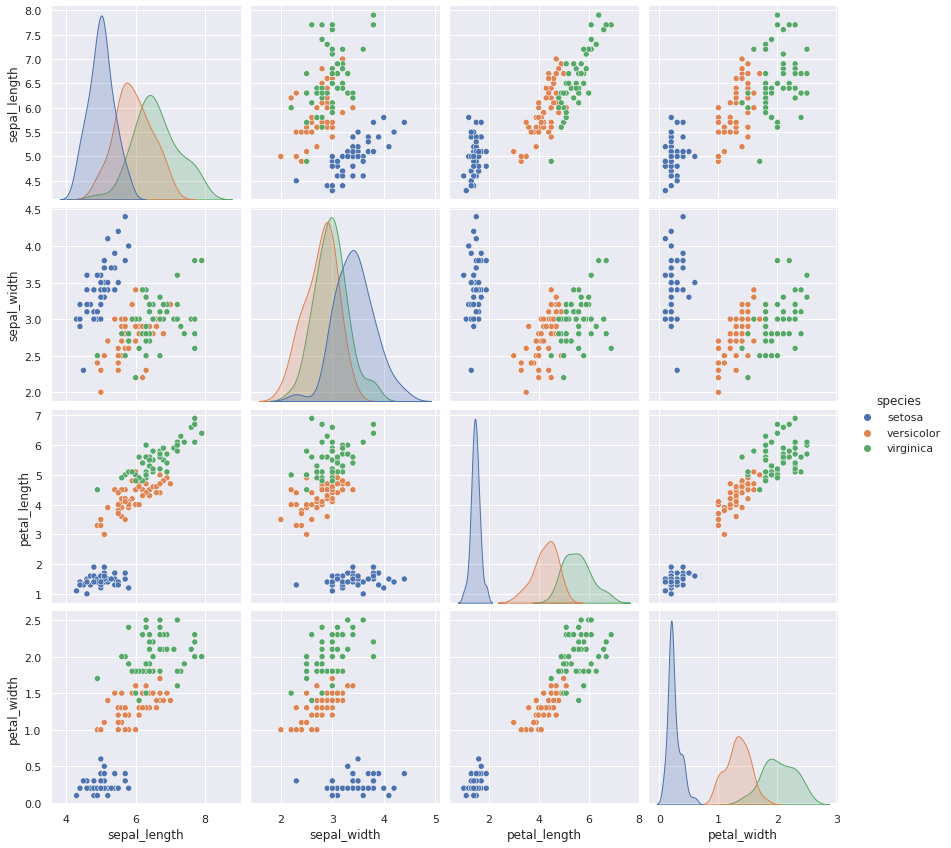

In [42]:
import seaborn as sns
iris = sns.load_dataset('iris')
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=3);

In [44]:
X_iris = iris.drop('species', axis=1)
X_iris.shape
y_iris = iris['species']
y_iris.shape

(150,)